In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri 4 Aug 11:44 2023

@author: WITD5
@checked: 
    
Projectcode: 100036-8
    
description: This sript takes (precipitation) input (timeseries data) from point
locations (rain gauges) and interpolates the precipitation values on an existing
grid. 

"""

#%% documentation

"""
Explanation of the script: This script: 
    1. Reads in a netcdf file with the original forcing grid
    2. Reads in timeseries data and their point locations
    3. Calculates an interpolated grid using Thiessen polygons on the timeseries 
    data using the extend and grid size of the forcing grid. 

"""

#%% import packages
# Import builtin modules
import os
import warnings
warnings.filterwarnings('ignore')

# Import required modules
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd

# Import custom modules
import setup_wflow as swf
        
      


In [2]:
#%% import directories and files

forcing_grid_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete\inmaps_era5_Nakuru_86400_2007_2021.nc"
local_p_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-13 KMD data Ruud\KMD and Lake\KMD_precipitation.csv"
voronoi_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-13 KMD data Ruud\voronoi_with_stations.gpkg"
output_path = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-13 KMD data Ruud\KMD and Lake\KMD_precipitation_interpolated_2007_2021.nc"


#input_dir = os.path.join(main_dir)
#output_dir = os.path.join(main_dir)



<xarray.DataArray 'precip' (time: 5479, latitude: 321, longitude: 233)> Size: 2GB
[409790847 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 44kB 2007-01-01 2007-01-02 ... 2021-12-31
  * longitude    (longitude) float64 2kB 35.84 35.84 35.84 ... 36.22 36.22 36.22
  * latitude     (latitude) float64 3kB -0.1821 -0.1838 ... -0.7138 -0.7154
    spatial_ref  int32 4B ...
Attributes: (12/35)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0
    unit:                                     mm
    precip_fn:             

,Pts2,Pts3,Pts4,Pts5,Pts6,Pts7,Pts8,Pts9,Pts10,Pts11,Pts12,Pts13,Pts14,Pts15
DATE,,,,,,,,,,,,,,
2007-01-01,0.014,0.000,0.000,0.079,0.000,0.044,0.023,0.753,0.043,0.798,3.204,3.792,3.898,2.588
2007-01-02,0.000,0.193,1.439,1.288,0.000,1.497,0.643,0.573,0.033,0.929,0.000,0.125,0.998,0.251
2007-01-03,2.458,0.000,0.335,1.286,0.000,0.000,0.000,0.235,0.000,0.000,0.381,0.625,1.995,0.000
2007-01-04,0.187,0.557,0.000,0.444,0.000,0.249,0.200,0.772,1.709,4.192,11.464,5.460,6.215,12.826
2007-01-05,0.000,0.000,0.000,0.000,0.000,0.102,0.000,0.449,0.000,0.256,0.000,0.000,0.000,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.278,0.000,0.000,0.000,0.000
2021-12-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.000
2021-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.209,0.000,0.000,0.358,0.000


Pts2
Pts3
Pts4
Pts5
Pts6
Pts7
Pts8
Pts9
Pts10
Pts11
Pts12
Pts13
Pts15
<xarray.DataArray 'precip' (latitude: 321, longitude: 233)> Size: 299kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(321, 233), dtype=float32)
Coordinates:
    time         datetime64[ns] 8B 2007-01-01
  * longitude    (longitude) float64 2kB 35.84 35.84 35.84 ... 36.22 36.22 36.22
  * latitude     (latitude) float64 3kB -0.1821 -0.1838 ... -0.7138 -0.7154
    spatial_ref  int32 4B ...
Attributes: (12/35)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:         

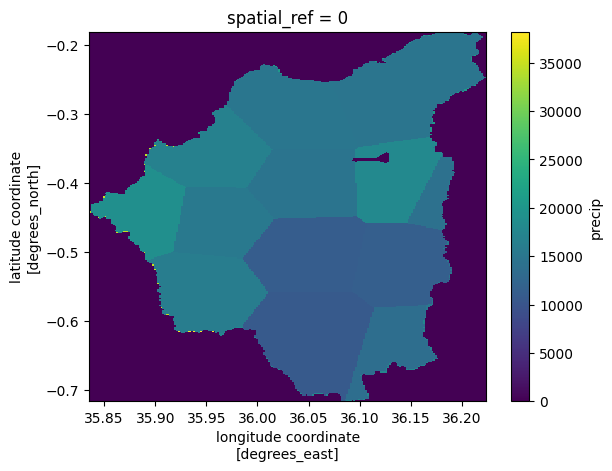

In [3]:
#%% Read in all variables

## Read in netcdf data with the original forcing grid
# Read in wflow forcing (ERA5) file
ERA5 = xr.open_dataset(forcing_grid_path)

# Get precipitation variable
data = ERA5['precip'][:, :, :]
print(data)


## Read in timeseries data of the point locations 
# Read local precipitation data
local_P = pd.read_csv(local_p_path, header=0, skiprows=4)



# set datetime index
#local_P['DATE'] = np.zeros(len(local_P))
#for i in range(len(local_P)):
    #year = str(local_P['année'].iloc[i])
    #month = str(local_P['mois'].iloc[i])
    #day = str(local_P['jour'].iloc[i])
    #date = year + '-' + month + '-' + day
    #local_P['date'].iloc[i] = date

# drop year, month, day columns
#local_P.drop('année', axis=1, inplace=True)
#local_P.drop('mois', axis=1, inplace=True)
#local_P.drop('jour', axis=1, inplace=True)

# set date colums as index
#local_P['DATE'] = pd.to_datetime(local_P['DATE'], format='%Y-%m-%d')

local_P['DATE'] = pd.to_datetime(local_P['DATE'], format='%Y%m%d')
local_P.set_index('DATE', inplace=True)
print(local_P)
# Select period between 2007 - 2021
local_P = local_P.loc['2007-01-01':'2021-12-31']
display(local_P)
# Fill no data values with zeros
local_P_ts = local_P.fillna(0)

# #print(local_P_ts)## Read in Thiessen polygon shapefile
# Get shapefile and provide value
shapefile_path = os.path.join(voronoi_path)
gdf = gpd.read_file(shapefile_path)

# # Set station name as index
gdf.set_index('station', inplace=True)


# #%%  Perform Thiessen polygon interpolation

# # Perform Thiessen polygon interpolation
Thiessen_result = swf.Thiessen_polygon_interpolation(forcing_grid=data, local_P_ts=local_P_ts, Thiessen_shp=gdf)

# # Print result
print(Thiessen_result[0, :, :])

# # Plot total result
Thiessen_result[:, : ,:].sum(axis=0).plot()


# #%% Export result

# # Put Thiessen result back in df
ERA5_Thiessen = ERA5.copy(deep=True)
ERA5_Thiessen['precip'] = Thiessen_result

# # Save Thiessen forcing file as
ERA5_Thiessen.to_netcdf(output_path, mode='w', format='NETCDF4', 
                        encoding={"precip": {"zlib": True, "complevel": 4}, 
                                  "pet": {"zlib": True, "complevel": 4}, 
                                  "temp": {"zlib": True, "complevel": 4}})

In [7]:
kmd_data = xr.open_dataset(output_path)
print(kmd_data)

<xarray.Dataset> Size: 833kB
Dimensions:    (latitude: 3, longitude: 2, time: 5479)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 24B -0.216 -0.466 -0.717
  * longitude  (longitude) float64 16B 35.84 36.09
  * time       (time) datetime64[ns] 44kB 2007-01-01 2007-01-02 ... 2021-12-31
Data variables:
    tp         (time, latitude, longitude) float32 131kB ...
    pev        (time, latitude, longitude) float32 131kB ...
    t2m        (time, latitude, longitude) float32 131kB ...
    msl        (time, latitude, longitude) float32 131kB ...
    ssrd       (time, latitude, longitude) float32 131kB ...
    tisr       (time, latitude, longitude) float32 131kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                 

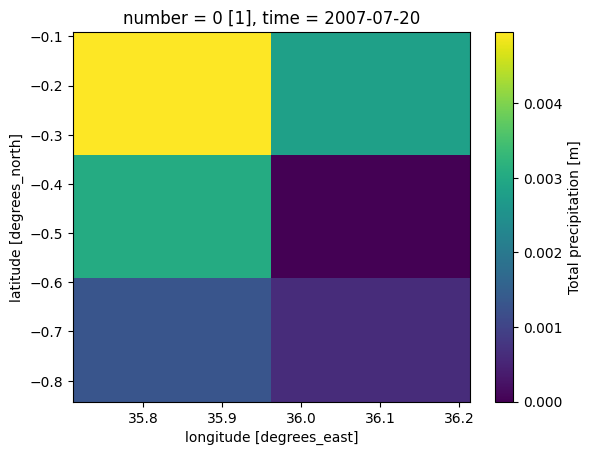

In [8]:
kmd_data['tp'][200,:,:].plot()

In [9]:
print(gdf)

            LAT      LON                                           geometry
station                                                                    
Pts2    -0.4433  35.8903  POLYGON ((35.92967 -0.40649, 35.91763 -0.49969...
Pts3    -0.3616  35.9595  POLYGON ((36.0149 -0.35182, 35.98947 -0.40722,...
Pts4    -0.4521  35.9584  POLYGON ((36.01691 -0.45226, 35.98529 -0.5095,...
Pts5    -0.5569  35.9432  POLYGON ((35.91763 -0.49969, 35.98529 -0.5095,...
Pts6    -0.3032  36.0432  POLYGON ((36.09867 -0.34826, 36.09575 -0.35148...
Pts7    -0.4002  36.0436  POLYGON ((36.09676 -0.44865, 36.01691 -0.45226...
Pts8    -0.5017  36.0482  POLYGON ((36.10704 -0.45873, 36.09208 -0.55743...
Pts9    -0.6143  36.0497  POLYGON ((36.01105 -0.55851, 36.09208 -0.55743...
Pts10   -0.2811  36.1231  POLYGON ((36.09867 -0.34826, 36.0723 -0.25292,...
Pts11   -0.3991  36.1489  POLYGON ((36.14589 -0.4582, 36.10704 -0.45873,...
Pts12   -0.5172  36.1505  POLYGON ((36.18054 -0.46792, 36.18042 -0.46792...
Pts13   -0.6